In [26]:
import sys
import spacy
import nltk
import pandas as pd
from itertools import combinations
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words()
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import wordnet
from nltk.corpus import words
import re
import itertools
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from nltk import pos_tag
from wordcloud import WordCloud
from string import punctuation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings('ignore')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /Users/juju/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/juju/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/juju/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/juju/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/juju/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
netflix_df=pd.read_csv('netflix-clean.csv')

In [5]:
netflix_df=netflix_df.drop(['Unnamed: 0'],axis=1)

In [6]:
stop_words = stopwords.words("english")
punc=list(punctuation)
word_list = words.words()

In [7]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   show_id            7787 non-null   object
 1   type               7787 non-null   object
 2   title              7787 non-null   object
 3   director           5398 non-null   object
 4   cast               7069 non-null   object
 5   country            7280 non-null   object
 6   date_added         7777 non-null   object
 7   release_year       7787 non-null   int64 
 8   rating             7780 non-null   object
 9   duration           7787 non-null   object
 10  listed_in          7787 non-null   object
 11  description        7787 non-null   object
 12  clean_description  7787 non-null   object
dtypes: int64(1), object(12)
memory usage: 791.0+ KB


In [8]:
tv=['TV','tv']
netflix_df['listed_in_clean']=netflix_df['listed_in'].str.lower()
netflix_df['listed_in_clean']=netflix_df['listed_in_clean'].apply(word_tokenize)
netflix_df['listed_in_clean']=netflix_df['listed_in_clean'].apply(lambda x: [word for word in x if word not in tv])
netflix_df['listed_in_clean']=netflix_df['listed_in_clean'].apply(lambda x: [word for word in x if word not in punc])
netflix_df['listed_in_clean']=netflix_df['listed_in_clean'].apply(lambda x: ' '.join(x))

In [9]:
netflix_df['cast_clean']=netflix_df['cast'].str.lower()
netflix_df['cast_clean']=netflix_df['cast_clean'].astype(str)

netflix_df['cast_clean']=netflix_df['cast_clean'].apply(word_tokenize)
netflix_df['cast_clean']=netflix_df['cast_clean'].apply(lambda x: [word for word in x if word not in punc])
netflix_df['cast_clean']=netflix_df['cast_clean'].apply(lambda x: ' '.join(x))

In [10]:
netflix_df['combined']=netflix_df['clean_description']+' '+netflix_df['listed_in_clean']+' '+netflix_df['cast_clean']

In [58]:
cv_tfidf=TfidfVectorizer()
cv_tfidf2=TfidfVectorizer()
corpus=netflix_df['clean_description'].tolist()
cv_tfidf=TfidfVectorizer(stop_words="english")
X_tfidf=cv_tfidf.fit_transform(corpus).toarray()
dt_tfidf=pd.DataFrame(X_tfidf,columns=cv_tfidf.get_feature_names())
dt_tfidf

,abandon,abandoned,abandonment,abbey,abduct,abduction,abiding,abigail,ability,able,...,zimbabwe,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zorro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
lsa = TruncatedSVD(10)
X_topic = lsa.fit_transform(X_tfidf) 
lsa.explained_variance_ratio_

array([0.00208096, 0.00355048, 0.00315005, 0.00299369, 0.00286486,
       0.00276797, 0.00254144, 0.00251656, 0.00235159, 0.00226453])

In [60]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5",
                     "component_6","component_7","component_8","component_9","component_10"],
             columns = cv_tfidf.get_feature_names())  
topic_word

,abandon,abandoned,abandonment,abbey,abduct,abduction,abiding,abigail,ability,able,...,zimbabwe,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zorro
component_1,0.001,0.008,0.001,0.001,0.002,0.002,0.000,0.001,0.008,0.001,...,0.001,0.001,0.0,0.001,0.001,0.005,0.004,0.000,0.000,0.000
component_2,0.001,0.000,0.002,-0.001,-0.002,0.001,-0.000,-0.000,-0.001,-0.001,...,-0.001,0.001,-0.0,-0.001,-0.000,0.000,-0.000,-0.001,-0.001,0.001
component_3,-0.000,0.004,0.000,0.001,0.006,-0.001,-0.001,0.001,0.001,-0.000,...,0.000,0.000,-0.0,0.000,-0.001,-0.001,0.002,-0.001,-0.001,-0.000
component_4,-0.000,-0.006,-0.001,-0.001,-0.002,0.001,0.000,-0.001,-0.003,0.001,...,-0.001,-0.001,-0.0,-0.001,-0.001,-0.007,-0.002,0.000,-0.000,-0.000
component_5,-0.001,0.004,0.001,-0.001,-0.001,0.001,-0.000,-0.000,0.001,0.000,...,0.002,0.001,0.0,0.001,-0.001,0.001,-0.005,-0.001,-0.000,-0.000
component_6,-0.000,0.001,0.005,0.001,0.000,-0.000,-0.000,-0.000,-0.004,-0.000,...,-0.001,0.000,0.0,-0.001,0.001,-0.006,-0.003,0.001,-0.000,-0.001
component_7,-0.001,0.004,-0.002,-0.001,0.000,0.000,0.000,0.000,-0.010,-0.000,...,0.001,0.001,0.0,0.001,0.002,-0.000,-0.004,0.001,0.001,0.000
component_8,0.001,0.004,-0.001,0.001,0.003,0.001,0.000,0.001,0.001,-0.000,...,-0.000,0.000,0.0,-0.000,-0.000,-0.002,0.001,-0.001,0.000,0.000
component_9,-0.001,-0.001,0.003,0.000,-0.002,-0.002,0.000,-0.000,-0.001,-0.002,...,-0.000,0.003,-0.0,-0.001,-0.003,-0.001,-0.000,-0.002,0.000,0.000
component_10,0.001,-0.005,-0.002,-0.000,0.002,0.000,0.000,-0.000,0.000,-0.001,...,0.001,-0.002,-0.0,0.000,0.002,-0.000,-0.003,0.001,0.000,-0.000


In [61]:
def print_topics(model, feature_names, num_words):
    for ix, topic in enumerate(model.components_):
        print("\nTopic", ix)
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-num_words - 1:-1]]))

In [62]:
print_topics(lsa,cv_tfidf.get_feature_names(),10)


Topic 0
young, life, man, family, new, woman, love, world, father, series

Topic 1
young, man, woman, father, son, daughter, mother, love, husband, marry

Topic 2
school, high, new, student, teen, love, girl, college, best, teacher

Topic 3
life, love, come, career, comic, personal, romance, high, fall, different

Topic 4
new, family, york, life, city, home, special, husband, town, couple

Topic 5
family, father, series, home, true, based, story, school, drama, wealthy

Topic 6
love, series, young, true, new, story, based, couple, group, fall

Topic 7
series, man, group, murder, life, school, documentary, police, comedy, friend

Topic 8
woman, documentary, young, family, new, school, high, series, world, history

Topic 9
documentary, man, true, story, death, love, new, murder, daughter, footage


In [68]:
cv = CountVectorizer(stop_words = 'english')
X_cv = cv.fit_transform(netflix_df.clean_description)

In [69]:
tw = cv.get_feature_names()
cv_df = pd.DataFrame(X_cv.toarray(), columns=tw)
cv_df

,abandon,abandoned,abandonment,abbey,abduct,abduction,abiding,abigail,ability,able,...,zimbabwe,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zorro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
nmf = NMF(n_components=10, random_state=42)
nmf.fit(X_tfidf)

print_topics(nmf,cv_tfidf.get_feature_names(),10)


Topic 0
help, group, save, father, home, murder, turn, mother, team, death

Topic 1
young, woman, husband, father, boy, marriage, couple, son, men, romance

Topic 2
school, high, student, teen, college, teacher, best, romance, crush, girl

Topic 3
life, come, career, comic, death, personal, job, comedian, different, film

Topic 4
new, york, city, home, special, old, star, soon, town, couple

Topic 5
family, father, wealthy, home, drama, business, time, brother, son, wedding

Topic 6
love, true, fall, romance, girl, story, college, triangle, childhood, different

Topic 7
world, war, way, cup, make, explore, save, living, sport, tour

Topic 8
series, documentary, comedy, history, based, story, reality, true, footage, film

Topic 9
man, wife, daughter, married, old, friend, village, marry, crime, wealthy


In [71]:
nmf.fit(X_cv)
print_topics(nmf,cv.get_feature_names(),10)


Topic 0
life, come, death, career, turn, comic, crime, job, personal, way

Topic 1
young, boy, girl, couple, mother, help, son, marriage, father, soon

Topic 2
new, york, city, home, help, town, old, friend, couple, soon

Topic 3
family, father, home, son, brother, wealthy, turn, drama, time, teen

Topic 4
world, war, save, way, help, mysterious, fight, cup, evil, explore

Topic 5
love, true, fall, girl, romance, triangle, story, college, way, daughter

Topic 6
school, high, teen, student, girl, group, team, best, college, teacher

Topic 7
man, wife, father, daughter, friend, old, police, crime, brother, help

Topic 8
series, documentary, comedy, based, true, story, history, reality, group, murder

Topic 9
woman, father, husband, home, son, help, past, mysterious, friend, revenge


In [72]:
topic_words = pd.DataFrame(nmf.components_.round(5),
             index = ["component_1","component_2",
                     "component_3","component_4",
                     "component_5","component_6",
                     "component_7","component_8",
                     "component_9","component_10"],
             columns = cv_tfidf.get_feature_names())
topic_words

,abandon,abandoned,abandonment,abbey,abduct,abduction,abiding,abigail,ability,able,...,zimbabwe,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zorro
component_1,0.00000,0.00000,0.00000,0.00000,0.00000,0.01046,0.00000,0.00000,0.02413,0.01180,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00655,0.00000,0.00000,0.00000
component_2,0.00000,0.00047,0.00000,0.00000,0.00000,0.00644,0.00000,0.00020,0.00533,0.00000,...,0.00000,0.00000,0.00000,0.00006,0.00000,0.00201,0.01027,0.00000,0.00000,0.00649
component_3,0.00000,0.01229,0.00000,0.00000,0.00503,0.00000,0.00006,0.00001,0.00732,0.00000,...,0.00612,0.00000,0.00012,0.00089,0.00000,0.00639,0.00000,0.00000,0.00002,0.00000
component_4,0.00000,0.00042,0.00742,0.00028,0.00000,0.00000,0.00003,0.00000,0.00164,0.00020,...,0.00000,0.00000,0.00022,0.00000,0.00010,0.00000,0.00000,0.00020,0.00002,0.00000
component_5,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00025,0.00013,0.01616,0.00097,...,0.00000,0.00000,0.00006,0.00024,0.00000,0.01051,0.01316,0.00029,0.00015,0.00000
component_6,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00011,0.00076,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00024,0.00131,0.00000,0.00000,0.00141,0.00002,0.00000
component_7,0.00000,0.01392,0.00000,0.00939,0.01863,0.00000,0.00001,0.00246,0.01495,0.00033,...,0.00000,0.00000,0.00001,0.00036,0.00000,0.00134,0.01346,0.00000,0.00000,0.00000
component_8,0.00948,0.00000,0.00000,0.00000,0.00140,0.00000,0.00000,0.00021,0.02615,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00054,0.01854,0.00526,0.00000,0.00000,0.00000
component_9,0.00000,0.01159,0.00000,0.00232,0.00000,0.00000,0.00060,0.00007,0.00000,0.00020,...,0.00000,0.00000,0.00044,0.00052,0.00428,0.00225,0.00000,0.00204,0.00074,0.00000
component_10,0.00000,0.02991,0.01041,0.00097,0.00017,0.00000,0.00000,0.00053,0.00000,0.00035,...,0.00000,0.01137,0.00000,0.00000,0.00000,0.00673,0.00000,0.00000,0.00000,0.00000


In [73]:
netflix_df['description2']=netflix_df['description'].str.lower()
netflix_df['description2']=netflix_df['description2'].apply(word_tokenize)
netflix_df['description2']=netflix_df['description2'].apply(lambda x: [word for word in x if word not in stop_words])
netflix_df['description2']=netflix_df['description2'].apply(lambda x: [word for word in x if word not in punc])
netflix_df['description2']=netflix_df['description2'].apply(lambda x: list(set(x)))

In [74]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clean_description,listed_in_clean,cast_clean,combined,description2
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...,international shows dramas sci-fi fantasy,joão miguel bianca comparato michel gomes rodo...,future elite inhabit island paradise far crowd...,"[island, slums, join, saved, inhabit, get, eli..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,devastating earthquake city trapped life wait ...,dramas international movies,demián bichir héctor bonilla oscar serrano aza...,devastating earthquake city trapped life wait ...,"[earthquake, wait, alive, city, devastating, s..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",army recruit found dead fellow forced confront...,horror movies international movies,tedd chan stella chung henley hii lawrence koh...,army recruit found dead fellow forced confront...,"[island, secret, 's, haunting, jungle, soldier..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",world hide fear dangerous exterminate brave ne...,action adventure independent movies sci-fi fan...,elijah wood john c. reilly jennifer connelly c...,world hide fear dangerous exterminate brave ne...,"[robots, dangerous, machines, rag-doll, joins,..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,brilliant group become intent swindling millio...,dramas,jim sturgess kevin spacey kate bosworth aaron ...,brilliant group become intent swindling millio...,"[brilliant, become, playing, experts, vegas, c..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,civil war family left grief little search,dramas international movies,imad creidi antoinette turk elias gergi carmen...,civil war family left grief little search dram...,"[family, 's, zozo, left, means, search, civil,..."
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,scrappy poor boy way tycoon family facing fear...,dramas international movies music musicals,vicky kaushal sarah-jane dias raaghav chanana ...,scrappy poor boy way tycoon family facing fear...,"[family, 's, dysfunctional, poor, tycoon, worm..."
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",documentary south rapper nasty stage street ci...,documentaries international movies music musicals,nasty c,documentary south rapper nasty stage street ci...,"[introducing, hits, sounds, 's, city, stage, d..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",

In [134]:
def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

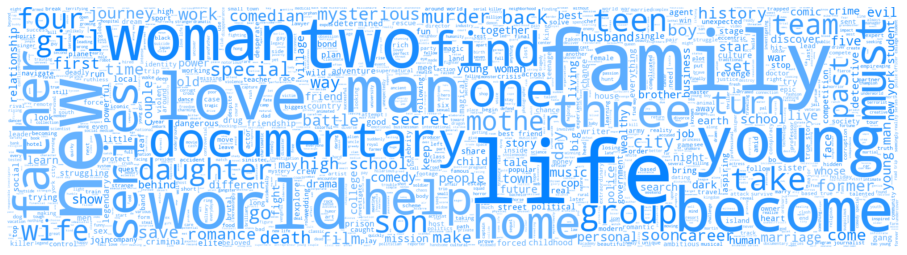

In [135]:
lst = netflix_df['description2'].tolist()
lst = list(itertools.chain(*lst))
description = ' '.join(lst)

plt.figure(figsize=(16,12))
wordcloud = WordCloud(background_color='white',max_font_size=50, max_words=100).generate(description)
plt.imshow(wordcloud2.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
#plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [95]:
word_matrix = cv_tfidf.fit_transform(netflix_df['clean_description'])

topic_matrix = nmf.transform(word_matrix)
topic_matrix_df = pd.DataFrame(topic_matrix).add_prefix('topic_')

topic_matrix_df[['title','description', 'clean_description']] = netflix_df[['title','description', 'clean_description']]
topic_matrix_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,title,description,clean_description
0,0.000516,0.001407,0.001616,0.000888,0.001265,0.001216,0.003531,0.000859,0.002772,0.001165,3%,In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...
1,0.020747,0.000662,0.006452,0.000549,0.001283,0.000000,0.000979,0.000849,0.000979,0.000036,7:19,After a devastating earthquake hits Mexico Cit...,devastating earthquake city trapped life wait ...
2,0.000311,0.001641,0.001533,0.002929,0.003747,0.000704,0.004914,0.002442,0.002541,0.001966,23:59,"When an army recruit is found dead, his fellow...",army recruit found dead fellow forced confront...
3,0.000122,0.000461,0.000248,0.000000,0.045435,0.000000,0.002928,0.000000,0.001961,0.000000,9,"In a postapocalyptic world, rag-doll robots hi...",world hide fear dangerous exterminate brave ne...
4,0.000367,0.000666,0.001482,0.000000,0.000659,0.000480,0.004588,0.000401,0.004373,0.000218,21,A brilliant group of students become card-coun...,brilliant group become intent swindling millio...


In [137]:
def get_top_descriptions(topic_label):
    for i in topic_matrix_df.sort_values(by=topic_label, ascending=False).head(10)['description'].values:
        print(i)
        print()

In [139]:
t_lst=['topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9',
      'topic_10']
for topic_num in t_lst:
    print(topic_num)
    get_top_descriptions(topic_num)

topic_0
In 1950s Makassar, the life of a devoted mother is upended when another woman enters her husband's life.

Sebastian Maniscalco brings an acerbically unique approach to peacocks on planes, life hacks, rich in-laws and life's annoyances in this comedy special.

A woman who's been alone on a spaceship her whole life becomes enamored with an engineer who suddenly enters her life and upends her universe.

Author Stephen Elliott has a problem separating his own life from incidents in the life of a convicted murderer about whom he's writing a book.

This series dramatizes the life story of Mexican superstar singer Luis Miguel, who has captivated audiences in Latin America and beyond for decades.

The complex historical figure of Leon Trotsky comes to life in this epic biography that depicts the tumultuous life of the Russian revolutionary.

Emmy-winning comedian Dana Carvey blends pitch-perfect takes on big personalities with so-true-it-hurts stories from his life as a dad of millenni

KeyError: 'topic_10'

In [76]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'clean_description', 'listed_in_clean', 'cast_clean', 'combined',
       'description2'],
      dtype='object')

In [77]:
small_df=netflix_df.drop(['show_id', 'type','director', 'cast','date_added','release_year',
                          'rating', 'duration', 'listed_in','description',
                         'description2'],axis=1)

In [78]:
small_df.country.value_counts()

United States                                                              2555
India                                                                       923
United Kingdom                                                              397
Japan                                                                       226
South Korea                                                                 183
                                                                           ... 
India, United Kingdom, China, Canada, Japan, South Korea, United States       1
India, Iran                                                                   1
United Kingdom, Canada, United States, Cayman Islands                         1
Spain, Canada, United States                                                  1
Argentina, Brazil, France, Poland, Germany, Denmark                           1
Name: country, Length: 681, dtype: int64

In [79]:
small_df.combined.head()

0    future elite inhabit island paradise far crowd...
1    devastating earthquake city trapped life wait ...
2    army recruit found dead fellow forced confront...
3    world hide fear dangerous exterminate brave ne...
4    brilliant group become intent swindling millio...
Name: combined, dtype: object

In [80]:
small_df['clean_description']=small_df['clean_description'].fillna('')
small_df['listed_in_clean']=small_df['listed_in_clean'].fillna('')

In [158]:
tfidf_matrix=cv_tfidf.fit_transform(small_df['combined'])
#tfidf_matrix_li=cv_tfidf2.fit_transform(small_df['listed_in_clean'])

In [159]:
tfidf_matrix.shape

(7787, 36831)

In [160]:
cv_tfidf.get_feature_names()

['18',
 '390',
 '4minute',
 '50',
 'aabhas',
 'aachal',
 'aacharekar',
 'aadarsh',
 'aadhi',
 'aaditi',
 'aaditya',
 'aadukalam',
 'aadya',
 'aahana',
 'aakarshan',
 'aakash',
 'aakeel',
 'aakshath',
 'aala',
 'aamina',
 'aamir',
 'aanand',
 'aanchal',
 'aarav',
 'aarden',
 'aarif',
 'aarjav',
 'aarna',
 'aarohi',
 'aaron',
 'aarti',
 'aarubala',
 'aarushi',
 'aarya',
 'aaryan',
 'aaryansh',
 'aarón',
 'aasha',
 'aashay',
 'aashi',
 'aashif',
 'aashish',
 'aasif',
 'aayam',
 'aayan',
 'abad',
 'abadie',
 'abaitua',
 'abana',
 'abandon',
 'abandoned',
 'abandonment',
 'abarca',
 'abargil',
 'abayomi',
 'abbad',
 'abbas',
 'abbasi',
 'abbasova',
 'abbass',
 'abbey',
 'abbi',
 'abbie',
 'abbington',
 'abbott',
 'abboudy',
 'abby',
 'abd',
 'abdalah',
 'abdalla',
 'abdallah',
 'abdeen',
 'abdel',
 'abdelaziz',
 'abdelghany',
 'abdelhafiz',
 'abdelhaq',
 'abdelilah',
 'abdelkader',
 'abdellah',
 'abdelmalek',
 'abdelmoneim',
 'abdelrahman',
 'abdi',
 'abdo',
 'abdoo',
 'abdou',
 'abdouni',


In [161]:
co_sim=linear_kernel(tfidf_matrix, tfidf_matrix)
#co_sim2=linear_kernel(tfidf_matrix_li,tfidf_matrix_li)

In [162]:
co_sim.shape

(7787, 7787)

In [163]:
indcs=pd.Series(small_df.index, index=small_df['title']).drop_duplicates()

In [164]:
def rec(title, cosine_sim=co_sim):
    idx=indcs[title]
    similarity=list(enumerate(cosine_sim[idx]))
    similarity=sorted(similarity, key=lambda x: x[1], reverse=True)
    similarity=similarity[1:11]
    idxs=[i[0] for i in similarity]
    #return small_df['title'].iloc[idxs]
    
    return_items=small_df['title'].iloc[idxs]
    recommended_movies = []
    for t in return_items:
        recommended_movies.append(t)
        print(t)
        
    return recommended_movies

In [165]:
rec("The 100")

The Search for Life in Space
Rememory
Star Trek: Deep Space Nine
3022
Iron Sky: The Coming Race
IO
Planet Earth II
Forbidden Planet
Lost in Space
Steam Team to the Rescue


['The Search for Life in Space',
 'Rememory',
 'Star Trek: Deep Space Nine',
 '3022',
 'Iron Sky: The Coming Race',
 'IO',
 'Planet Earth II',
 'Forbidden Planet',
 'Lost in Space',
 'Steam Team to the Rescue']

In [89]:
small_df.to_csv('df-for-app.csv')

In [90]:
small_df['title'][1200:1259]

1200                                       Candyman
1201                                       Cannabis
1202                                 Cannon Busters
1203                                         Canvas
1204            Capital in the Twenty-First Century
1205                                     Cappuccino
1206          Captain Underpants Epic Choice-o-Rama
1207               Captain Underpants Mega Blissmas
1208                                        Captive
1209                    Car Masters: Rust to Riches
1210                                         Carbon
1211                            Cardboard Gangsters
1212                              Cardcaptor Sakura
1213                           Care Bears & Cousins
1214              Care Bears: Welcome to Care-a-Lot
1215                          Care of Kancharapalem
1216                                      Caregiver
1217                                          Cargo
1218              Carlos Almaraz: Playing with Fire
1219        

In [91]:
netflix_df.to_csv('netflix-final.csv')

In [ ]:
for tweet in tweet_topic_matrix_df.sort_values(by='topic_0', ascending=False).head(10)['raw_tweets'].values:
    print(tweet)
    print()